#What is Time series?????

A time series is a sequence of data being recorded at different time intervals

Depending on the frequency , a time series can be of yeary, quartely, monthly, etc etc

# Types of data:

1. Time series data: observations recorded at different intervals of time.( focus on same variable at different intervals of time )

2. Cross sectional data: observations recorded at same interval of time( focus on several variables at same time)

3. Pooled data: Time series data + Cross sectional data 

# Components of time series:

1. Trend: general direction of time series data over a long period of time

2. Seasonality: trend that repeats with respective to time, direction and magnitude.

3. Noise/Residual/Cyclic/Irregularity: Some random variables that can not be predicted

#Stationarity

mean, variance donot change with time

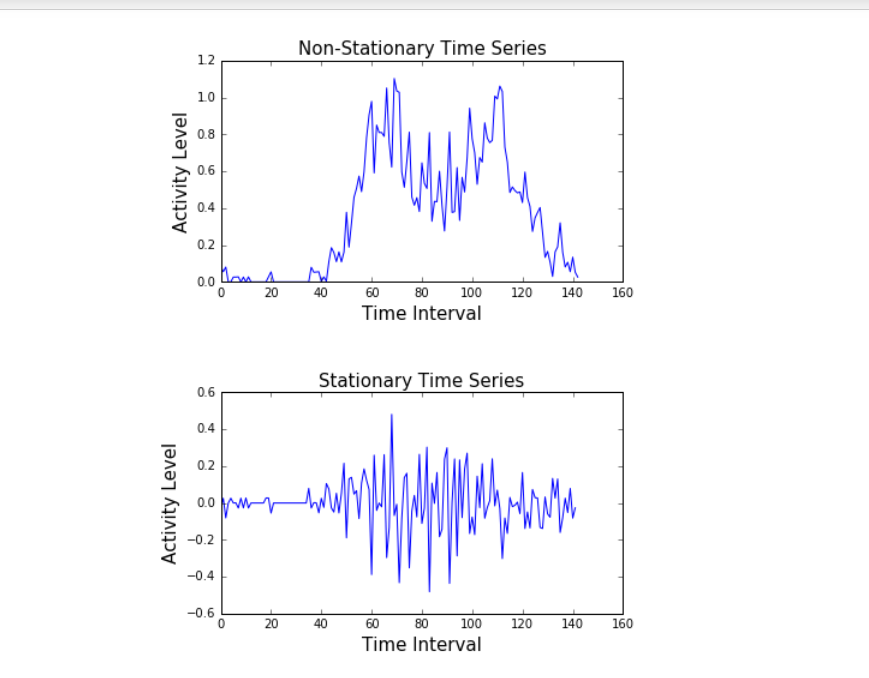

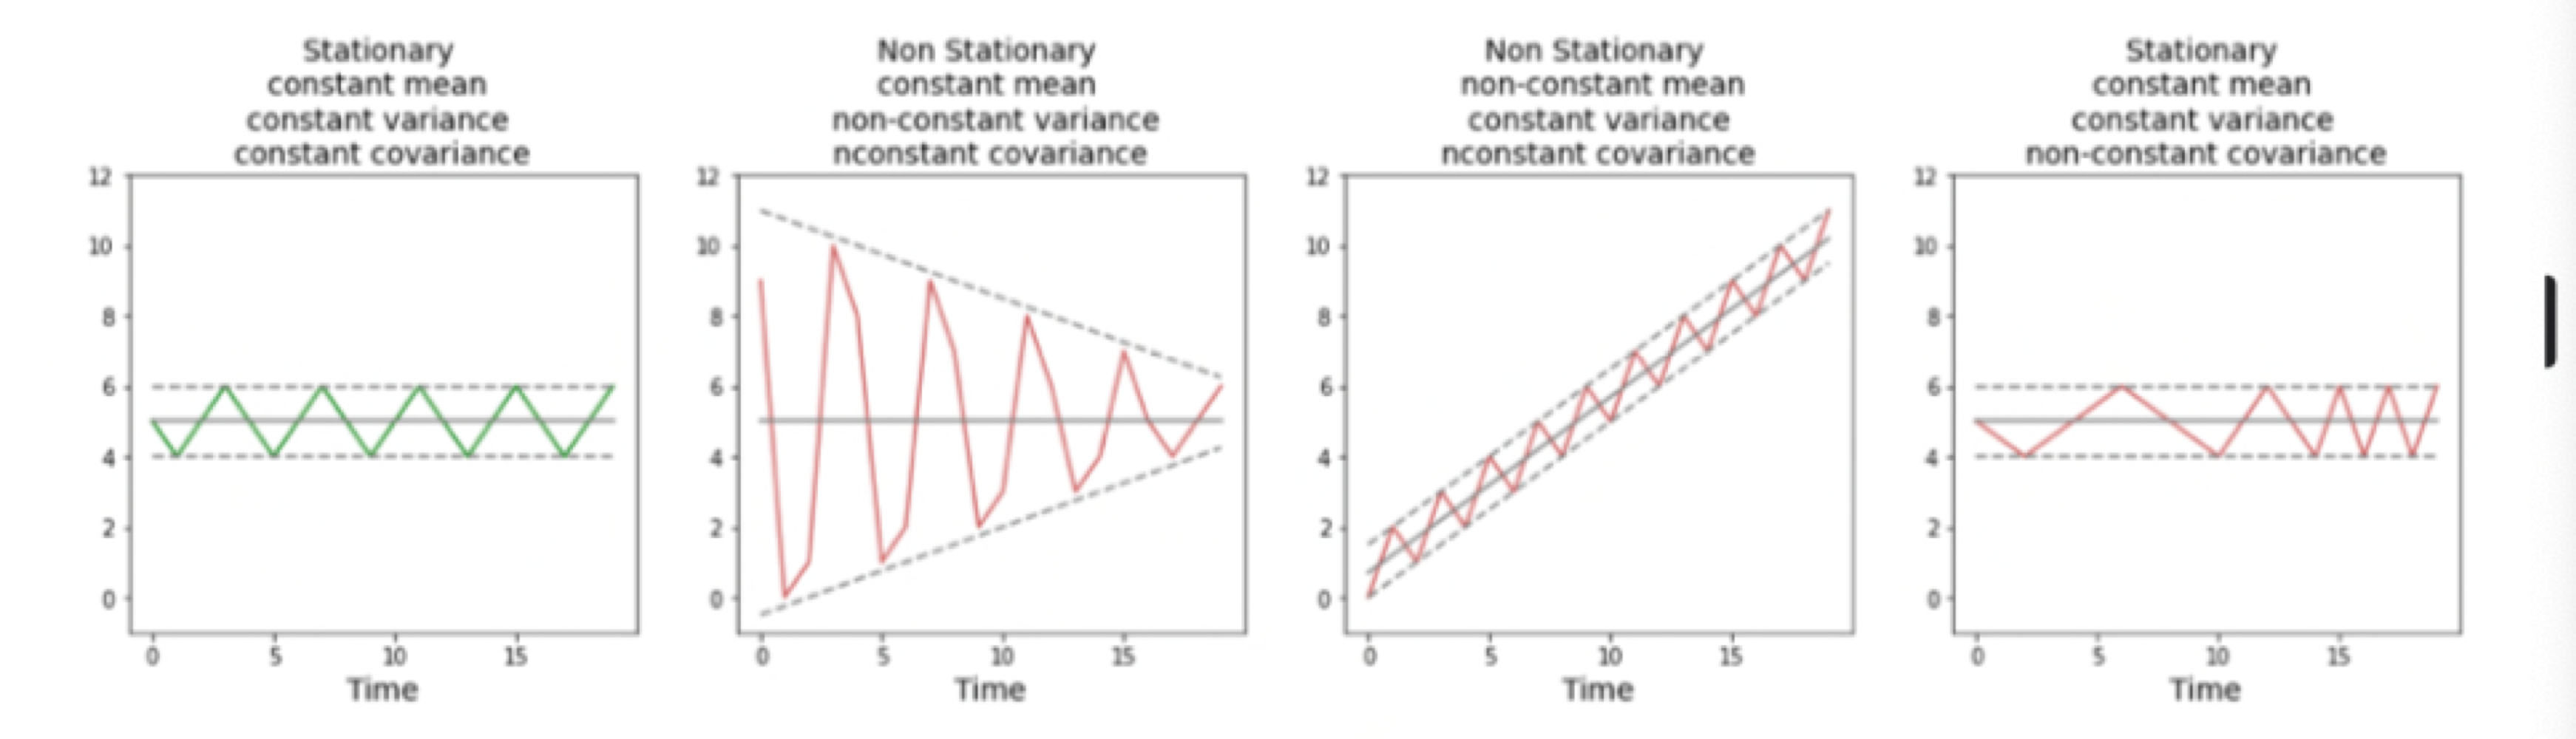

In [ ]:
# #Steps to perform

# -> load your dataset
# -> check the stationarity
# -> if non stationary then make is stationary
# -> Model building - Arima, Sarimax

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data["Month"] = pd.to_datetime(data["Month"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<Axes: >

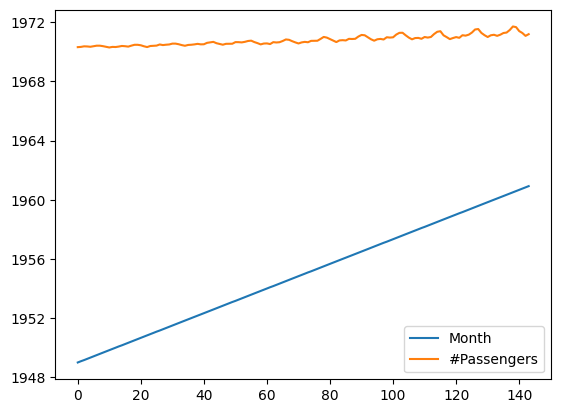

In [ ]:
data.plot()

In [ ]:
data = data.set_index(["Month"])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

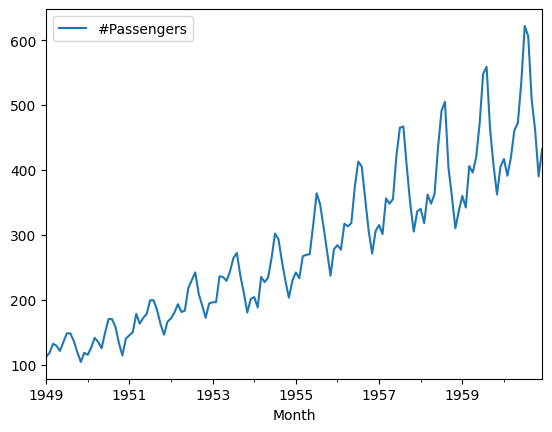

In [ ]:
data.plot()

#Lets check if the data is stationary or not

# 1. Visualizing
# 2. Stats -> split the series into two parts, calculate mean, variance, autocorrelation , if same of both parts than it is stationary
# 3. Statistical test -> Unit root test(ADF,KPSS,PP)

#AD fuller test

H0 -> Non stationary

H1 - > Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,0.8153688792060498
p-value=0.991880243437641
n_lags,13
The series is not stationary


# Now from the results it is clear that data is non stationary , so we need to convert it into stationary data

How??

-> Transformation(log or nth root to stabalize non constant variance]

-> Differencing (subtract current value from  previous )

-> Shift method

-> Rolling statistics


Why??

-> Forecasting becomes easy

-> Statinary series are more reliable


#Rolling statistics



Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.
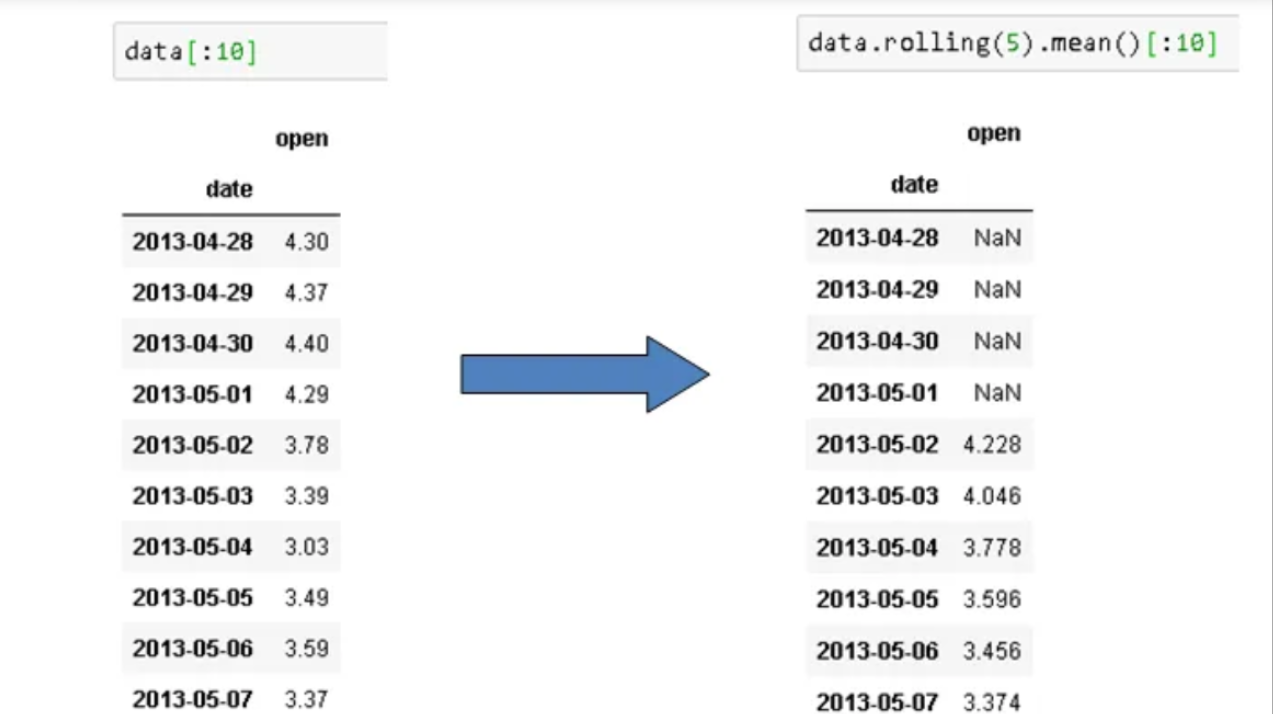
![download.png](attachment:download.png)

Here are some reasons why we perform rolling statistics:

Smoothing: Rolling statistics help in smoothing out the noise or random fluctuations in the data. By calculating the average over a moving window, extreme values or outliers are mitigated, and the underlying trends and patterns become more apparent.

Trend detection: Rolling statistics enable the identification of trends in time series data. By calculating moving averages, it becomes easier to observe whether the data is increasing, decreasing, or staying relatively stable over time. Trends are useful for forecasting and making predictions.

Seasonality analysis: Time series data often exhibit recurring patterns due to seasonality, such as daily, weekly, or yearly patterns. Rolling statistics can help identify these patterns by calculating rolling averages over a relevant period. This information is valuable in understanding and predicting seasonal fluctuations.

In [ ]:
mean_log = data.rolling(window = 12).mean()  #Rolling mean
std_log = data.rolling(window = 12).std()  #Rolling Standard deviation

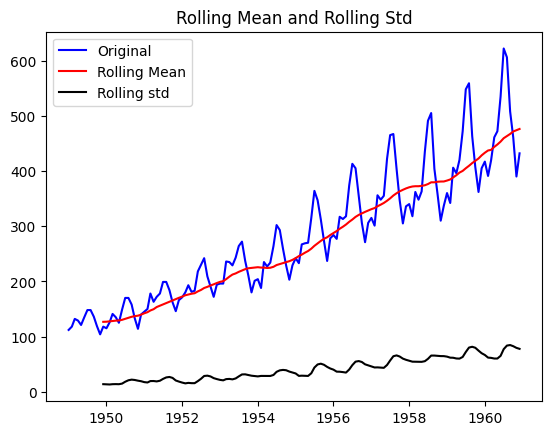

In [ ]:
#Lets plot the rolling mean and rolling std
plt.plot(data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

From the above graph, we see that rolling mean itself has a trend component 
even though rolling standard deviation is fairly constant with time. For our 
time series to be stationary, we need to ensure that both the rolling statistics 
ie: mean & std. dev. remain time invariant or constant with time. Thus the curves 
for both of them have to be parallel to the x-axis, which in our case is not so.

In [ ]:
#Transformations

first_log = np.log(data)

In [ ]:
first_log = first_log.dropna()

# However, the np.log() function may produce NaN values if any of the original data points are negative or zero. 
# By calling dropna() on first_log, any resulting NaN values are removed from the dataset, 
# ensuring that only valid data remains for subsequent analysis.

In [ ]:
#Lets plot again
#Rolling stats
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

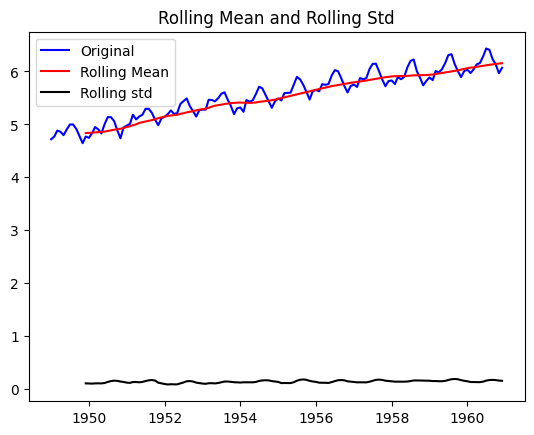

In [ ]:
#Lets plot the rolling mean and rolling std
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()


In [ ]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


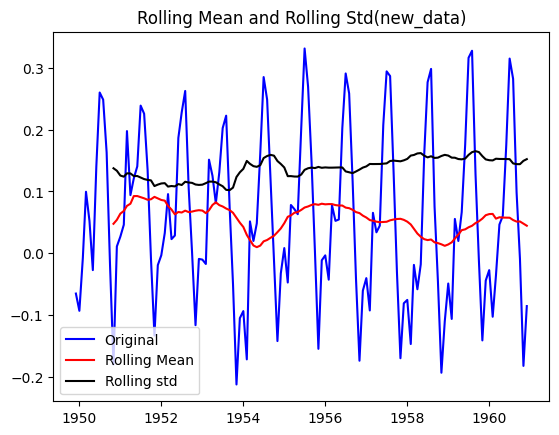

In [ ]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std(new_data)')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-3.1629079913008833
p-value=0.022234630001242206
n_lags,13
series is stationary


Text(0.5, 1.0, 'data')

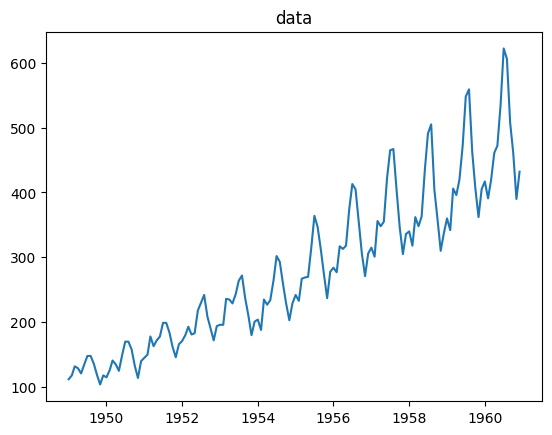

In [ ]:
plt.plot(data)
plt.title("data")

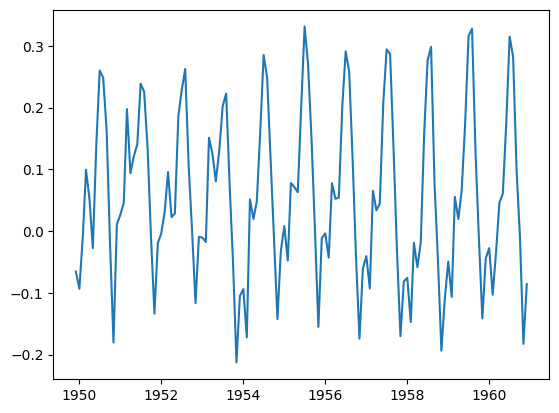

In [ ]:
plt.plot(new_data)


#Model building

Arima(AutoRegressive Integrated Moving Average)

AR I MA

AR component (AutoRegression)-> captures the linear relationship between current observations and past observation
(p)

I -> The differencing component which removes the trend, seasonality from the time series

MA component (Moving average) ->  it models the error term as a linear combination of past terms
(q)



In [ ]:
#ARIMA  --->  p(PACF plot), d, q(ACF plot)

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf



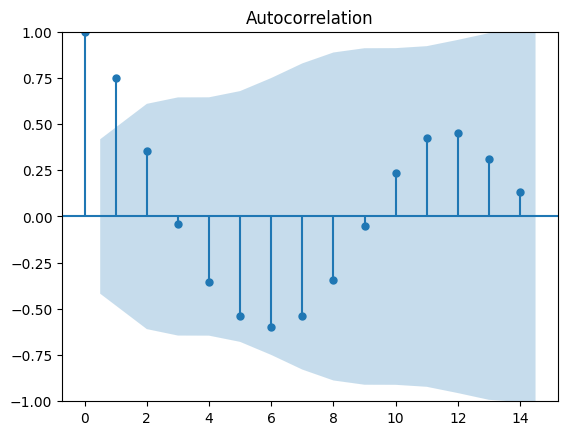

In [ ]:
acf_plot=acf(new_data.dropna()) #Gradual decrease and previuous point to that - 1
plot_acf(acf_plot);

In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


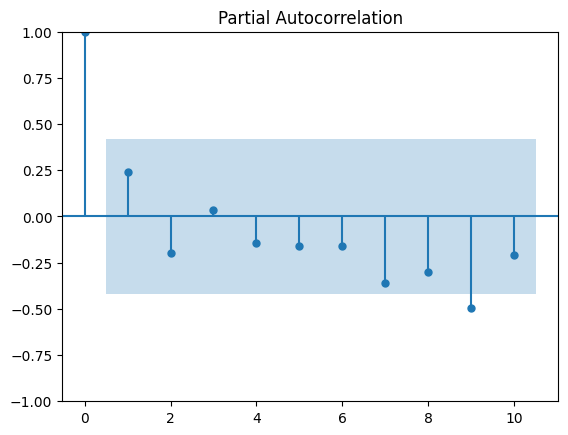

In [ ]:
pacf_plot=pacf(new_data.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10);

In [ ]:
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[120:]['#Passengers']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train,order=(1,1,2)) #(p,d,q)
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data["predict"] = model_fit.predict(start= len(train), end = len(train) + len(test) - 1, dynamic = True)

# start=len(train) indicates that the prediction should start from the index immediately following the last index of the training data.

# end=len(train)+len(test)-1 sets the end index for the prediction range. len(train)+len(test) represents the total length of 
# both the training and test data, and subtracting 1 ensures that the prediction ends at the last index of the test data.

# dynamic=True suggests that the predictions are made dynamically, meaning that each prediction uses the previously predicted value 
# as input for the next prediction, rather than using the actual values from the test data.

<Axes: xlabel='Month'>

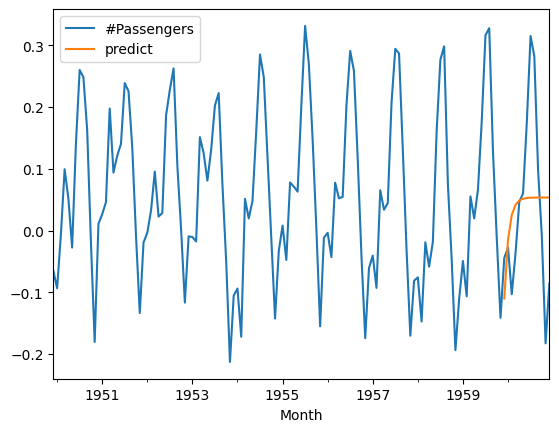

In [ ]:
new_data[["#Passengers",'predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train,order=(1,1,2), seasonal_order = (1,1,2,12))

# The (1, 1, 2, 12) seasonal order represents the seasonal ARIMA component of the SARIMAX model. Let's break down each component:

# The first number, 1, represents the seasonal autoregressive (AR) component order. It indicates that the model includes 
# a lag of one for the seasonal AR component.

# The second number, 1, represents the seasonal differencing (I) component order. It indicates that the model includes a first-order 
# seasonal difference to make the time series stationary.

# The third number, 2, represents the seasonal moving average (MA) component order. It indicates that the model includes two lags of the 
# seasonal MA component.

# The last number, 12, represents the seasonal period or the number of observations per season. In this case, the seasonal pattern repeats 
# every 12 observations, suggesting that the data has a yearly seasonality.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

TypeError: ignored